<a href="https://colab.research.google.com/github/yuriborg/models/blob/main/Pulp_and_Paper_Predictive_Maintanance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

## Installations

In [ ]:
!pip install python-docx

## Imports

In [ ]:
from google.colab import drive
from google.colab import files
import pickle
import docx
import pandas as pd
import numpy as np
import io
import seaborn as sns
from matplotlib import pyplot as plt
np.random.seed(1337)
from IPython.display import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Extraction

In [ ]:
uploaded = files.upload()

Saving PM_test.txt to PM_test (1).txt
Saving PM_train.txt to PM_train (1).txt


## Test Data

In [ ]:
colnames=['asset_id', 'runtime', 'setting1', 'setting2', 'setting3', 'tag1',
          'tag2', 'tag3', 'tag4', 'tag5', 'tag6', 'tag7', 'tag8', 'tag9',
          'tag10', 'tag11', 'tag12', 'tag13', 'tag14', 'tag15', 'tag16', 'tag17',
          'tag18', 'tag19', 'tag20', 'tag21']

In [ ]:
test = pd.read_csv('PM_test.txt', names=colnames, delim_whitespace=True, engine='c', header=None)
test.head()

,asset_id,runtime,setting1,setting2,setting3,tag1,tag2,tag3,tag4,tag5,...,tag12,tag13,tag14,tag15,tag16,tag17,tag18,tag19,tag20,tag21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


## Train Data

In [ ]:
train = pd.read_csv('PM_train.txt', names=colnames, delim_whitespace=True, engine='c', header=None)
train.head()

,asset_id,runtime,setting1,setting2,setting3,tag1,tag2,tag3,tag4,tag5,...,tag12,tag13,tag14,tag15,tag16,tag17,tag18,tag19,tag20,tag21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


# EDA

## Checking missing values

In [ ]:
print(train.isnull().sum(), '\n train nulls\n')
print('\n', test.isnull().sum(), '\n test nulls\n')

asset_id    0
runtime     0
setting1    0
setting2    0
setting3    0
tag1        0
tag2        0
tag3        0
tag4        0
tag5        0
tag6        0
tag7        0
tag8        0
tag9        0
tag10       0
tag11       0
tag12       0
tag13       0
tag14       0
tag15       0
tag16       0
tag17       0
tag18       0
tag19       0
tag20       0
tag21       0
dtype: int64 
 train nulls


 asset_id    0
runtime     0
setting1    0
setting2    0
setting3    0
tag1        0
tag2        0
tag3        0
tag4        0
tag5        0
tag6        0
tag7        0
tag8        0
tag9        0
tag10       0
tag11       0
tag12       0
tag13       0
tag14       0
tag15       0
tag16       0
tag17       0
tag18       0
tag19       0
tag20       0
tag21       0
dtype: int64 
 test nulls



## Checking for wrong entries like symbols -,?,#,*,etc.

In [ ]:
for col in test.columns:
    print('{} : {}'.format(col,test[col].unique()))

asset_id : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
runtime : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 

In [ ]:
for col in test.columns:
    print('{} : {}'.format(col,train[col].unique()))

asset_id : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
runtime : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 

## General information

In [ ]:
print('\n', test.info(), '\n')
print('\n', train.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   asset_id  13096 non-null  int64  
 1   runtime   13096 non-null  int64  
 2   setting1  13096 non-null  float64
 3   setting2  13096 non-null  float64
 4   setting3  13096 non-null  float64
 5   tag1      13096 non-null  float64
 6   tag2      13096 non-null  float64
 7   tag3      13096 non-null  float64
 8   tag4      13096 non-null  float64
 9   tag5      13096 non-null  float64
 10  tag6      13096 non-null  float64
 11  tag7      13096 non-null  float64
 12  tag8      13096 non-null  float64
 13  tag9      13096 non-null  float64
 14  tag10     13096 non-null  float64
 15  tag11     13096 non-null  float64
 16  tag12     13096 non-null  float64
 17  tag13     13096 non-null  float64
 18  tag14     13096 non-null  float64
 19  tag15     13096 non-null  float64
 20  tag16     13096 non-null  fl

## Detecting outliers

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
asset_id,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
runtime,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
tag1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
tag2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
tag3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
tag4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
tag5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


In [ ]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
asset_id,13096.0,51.543907,2.828942e+01,1.0000,28.0000,52.0000,76.0000,100.0000
runtime,13096.0,76.836515,5.305775e+01,1.0000,33.0000,69.0000,113.0000,303.0000
setting1,13096.0,-0.000011,2.202685e-03,-0.0082,-0.0015,-0.0000,0.0015,0.0078
setting2,13096.0,0.000004,2.940306e-04,-0.0006,-0.0002,-0.0000,0.0003,0.0007
setting3,13096.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
tag1,13096.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
tag2,13096.0,642.475088,4.008993e-01,641.1300,642.1975,642.4600,642.7400,644.3000
tag3,13096.0,1588.099204,5.003274e+00,1569.0400,1584.6000,1587.9900,1591.3625,1607.5500
tag4,13096.0,1404.735362,6.688309e+00,1384.3900,1399.9500,1404.4400,1409.0500,1433.3600
tag5,13096.0,14.620000,1.776425e-15,14.6200,14.6200,14.6200,14.6200,14.6200


- We see that there are some sensors where the standard deviation (std) is zero and the max and min values are identical. In our problem, this means these sensors aren't in activity, so lets drop these sensors.

In [ ]:
train.drop(['setting3', 'tag1', 'tag10', 'tag18', 'tag19'], axis=1, inplace=True)
test.drop(['setting3', 'tag1', 'tag10', 'tag18', 'tag19'], axis=1, inplace=True)

## Distribution and correlation of variables

<Axes: >

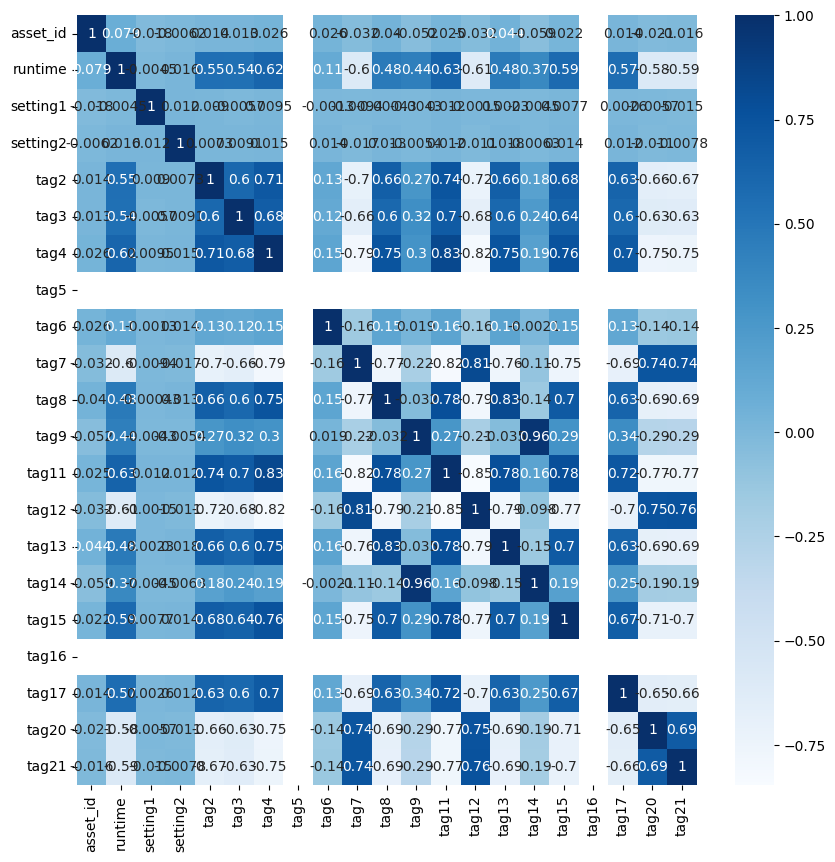

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),cbar=True,annot=True,cmap='Blues')

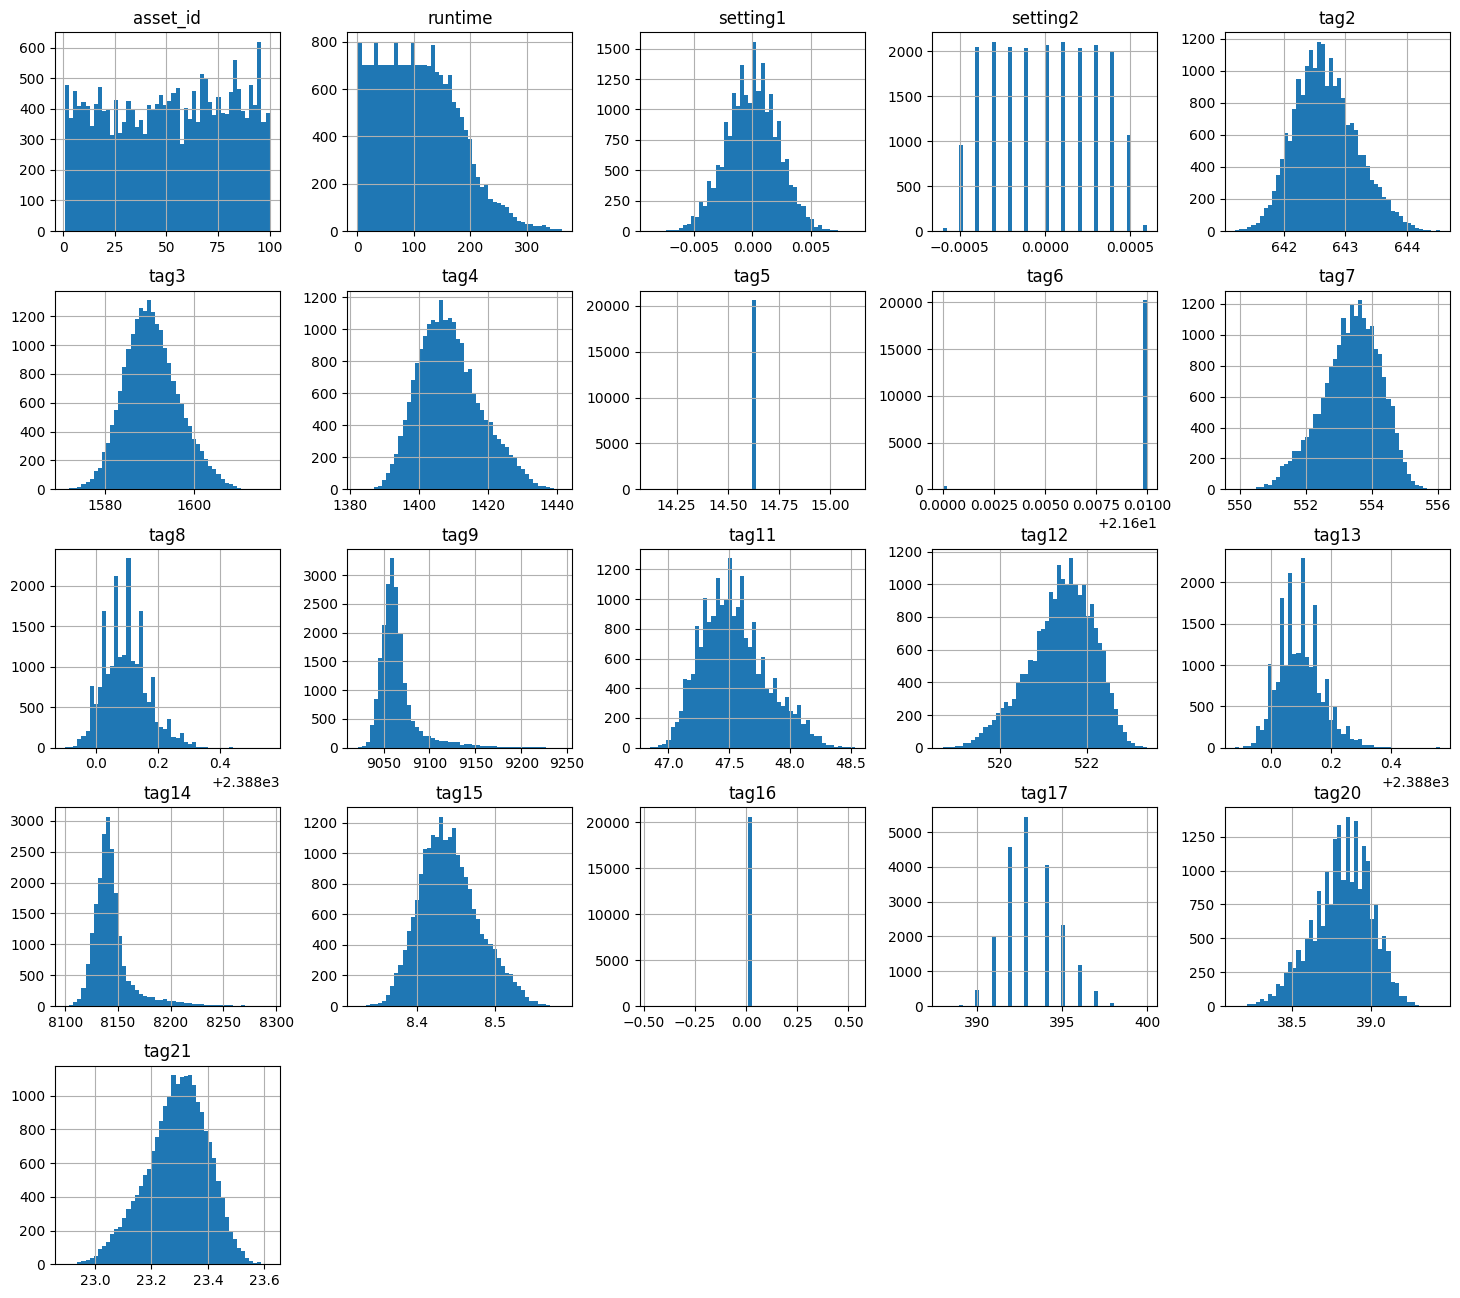

In [ ]:
train.hist(bins=50, figsize=(18,16))
plt.show()

<Axes: >

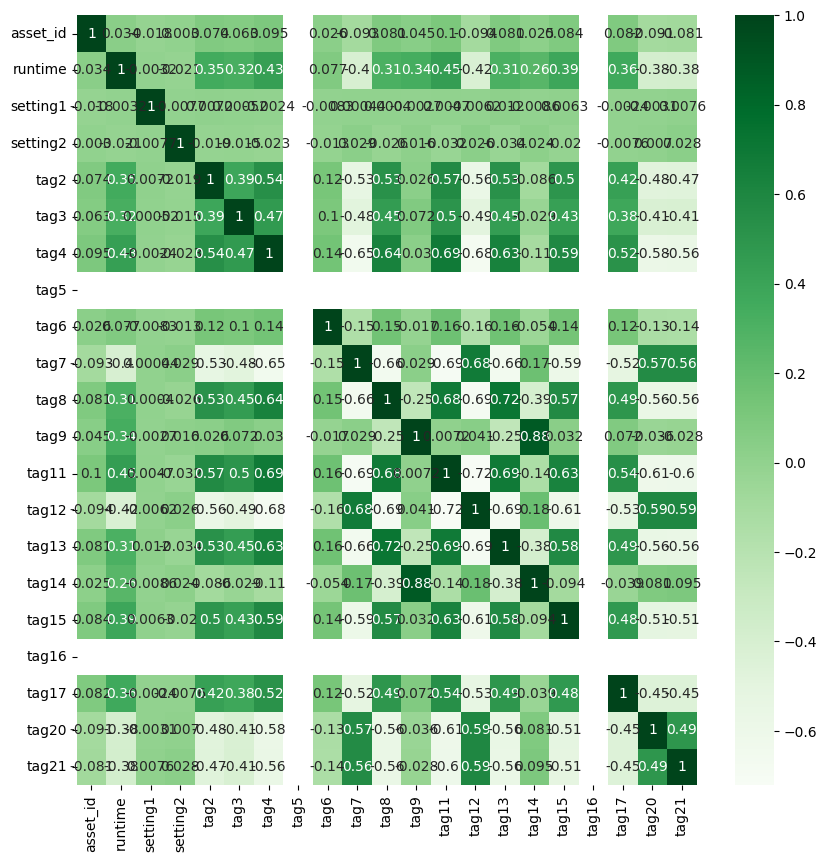

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(test.corr(),cbar=True,annot=True,cmap='Greens')

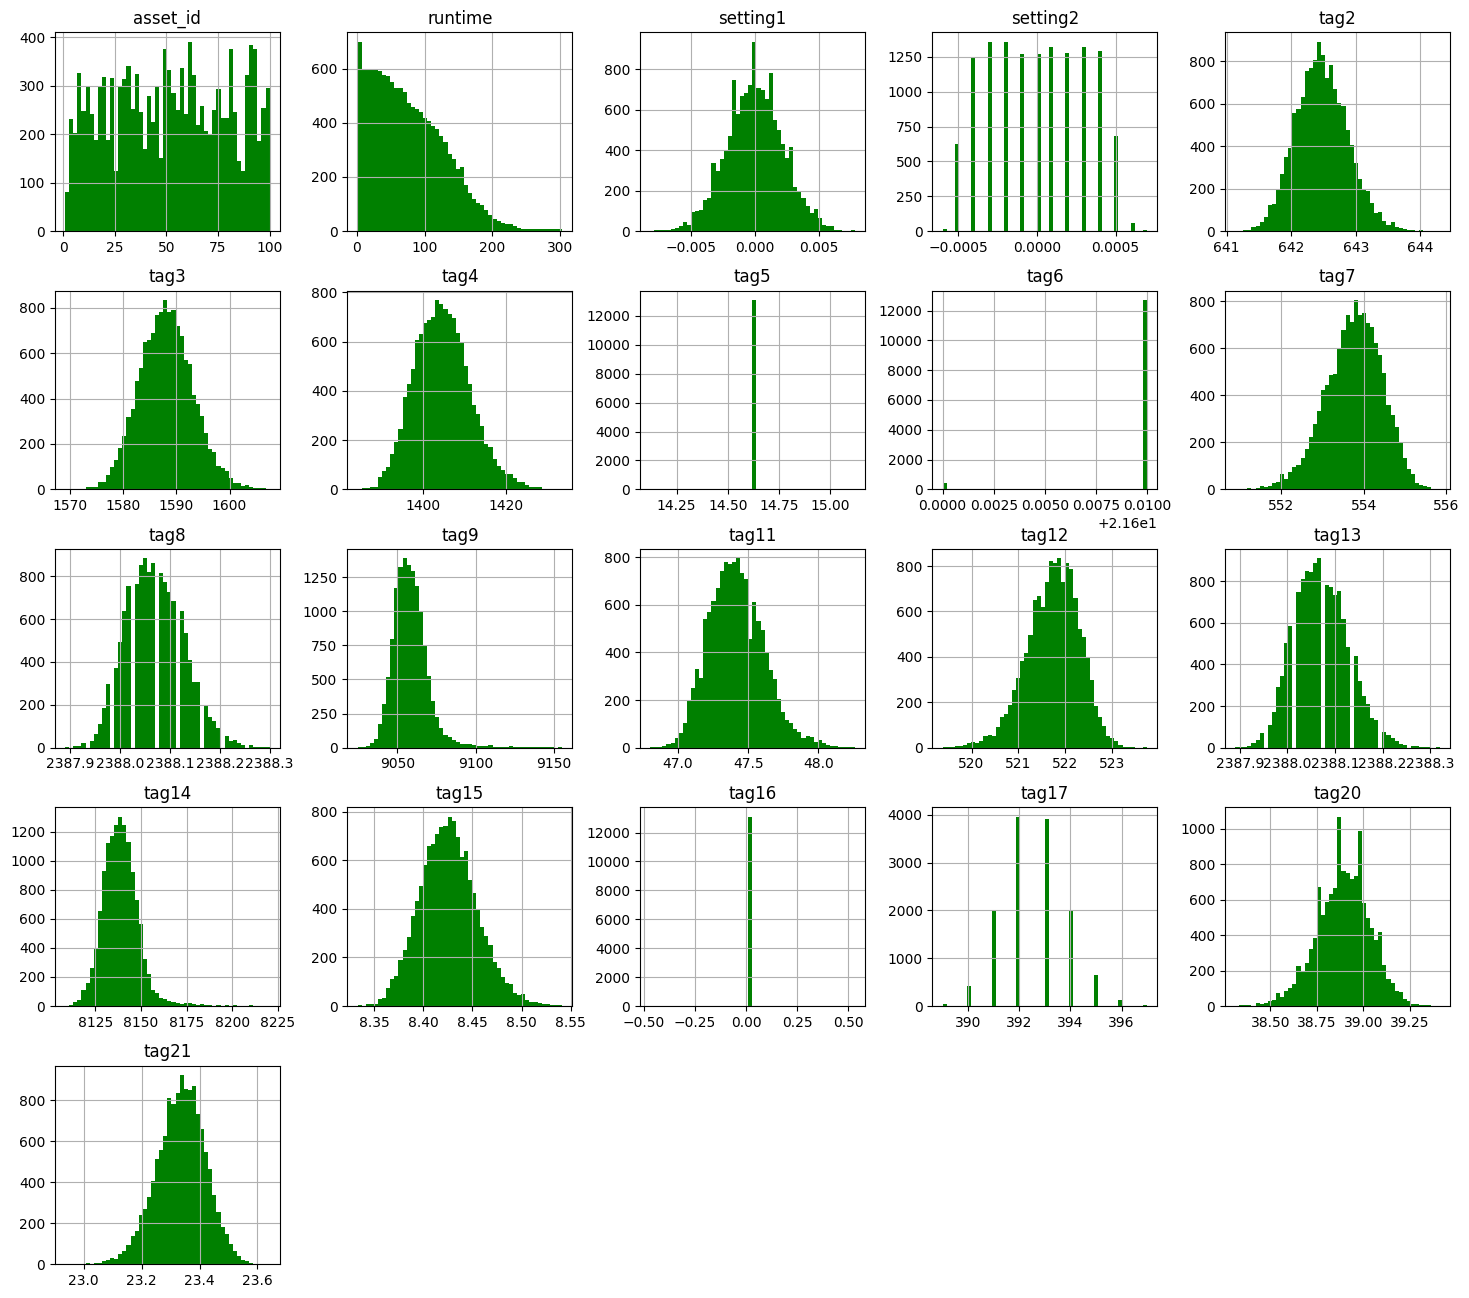

In [ ]:
test.hist(bins=50, figsize=(18,16), color="green")
plt.show()

## Maximum Number of cycles(runtime) per AssetId

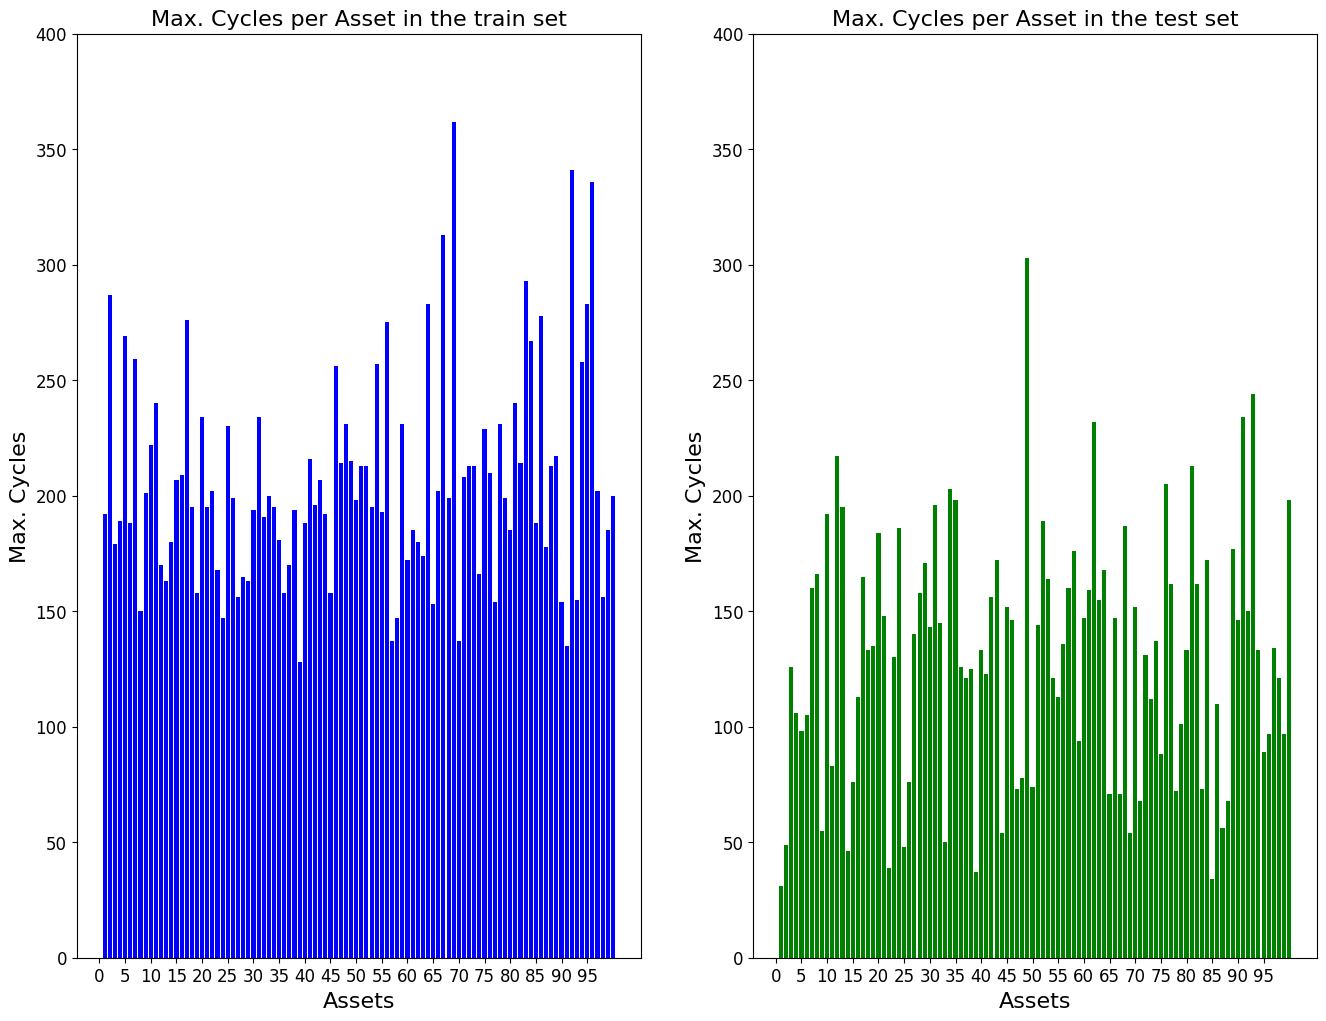

In [ ]:
cyclestrain = train.groupby('asset_id', as_index=False)['runtime'].max()
cyclestest = test.groupby('asset_id', as_index=False)['runtime'].max()

fig = plt.figure(figsize = (16,12))
fig.add_subplot(1,2,1)

bar_labels = list(cyclestrain['asset_id'])
bars = plt.bar(list(cyclestrain['asset_id']), cyclestrain['runtime'], color='blue')

plt.ylim([0, 400])
plt.xlabel('Assets', fontsize=16)
plt.ylabel('Max. Cycles', fontsize=16)

plt.title('Max. Cycles per Asset in the train set', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)


fig.add_subplot(1,2,2)
bars = plt.bar(list(cyclestest['asset_id']), cyclestest['runtime'], color='green')

plt.ylim([0, 400])
plt.xlabel('Assets', fontsize=16)
plt.ylabel('Max. Cycles', fontsize=16)

plt.title('Max. Cycles per Asset in the test set', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Sensors for a Particular Asset

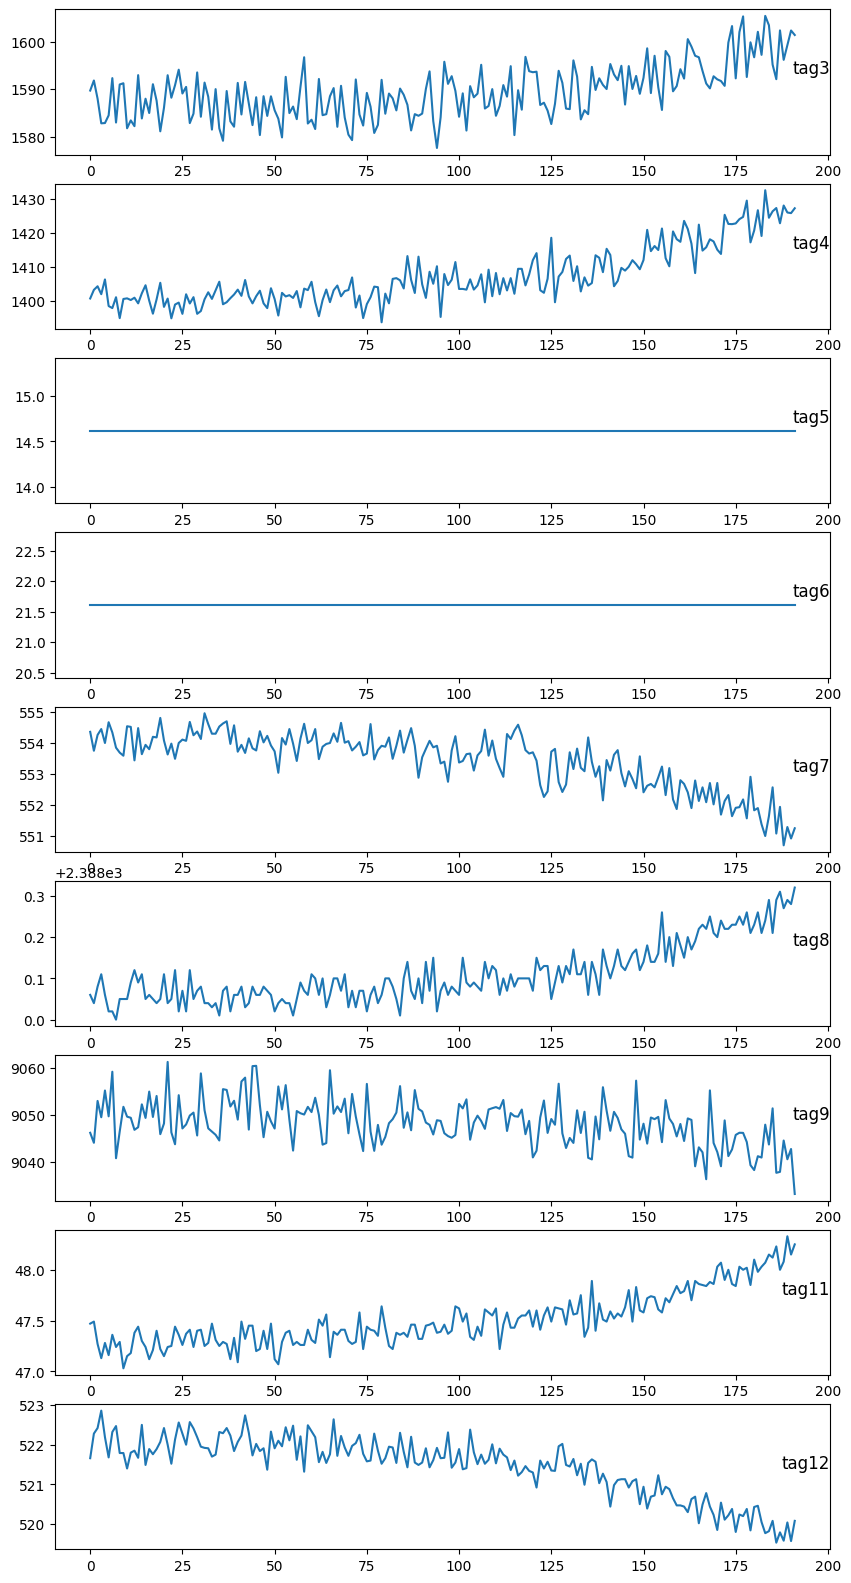

In [ ]:
values = train[train.asset_id==1].values
groups = [5, 6, 7, 8, 9, 10, 11,12,13]
i = 1
plt.figure(figsize=(10,20))
for group in groups:
 plt.subplot(len(groups), 1, i)
 plt.plot(values[:, group])
 plt.title(train.columns[group], y=0.5, loc='right')
 i += 1
plt.show()

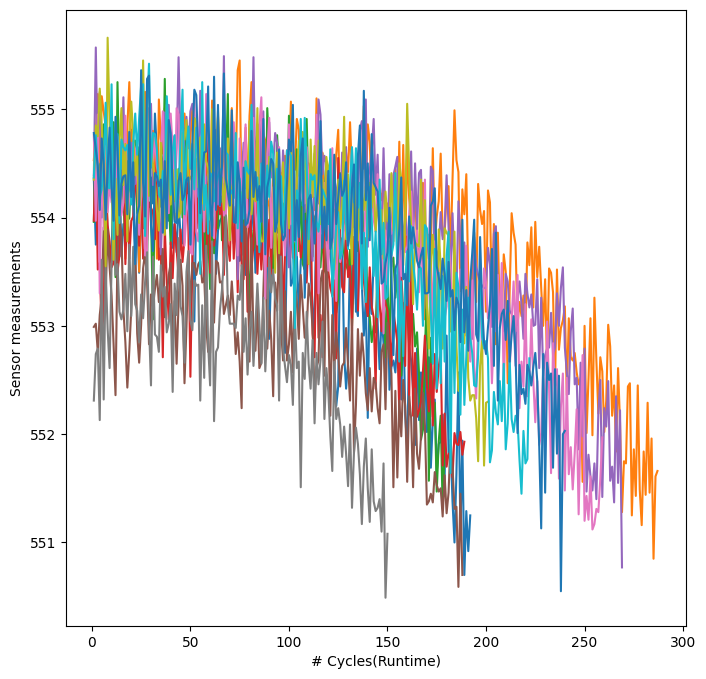

In [ ]:
plt.figure(figsize = (8, 8))
plt.plot(train[train.asset_id==1].runtime, train[train.asset_id==1].tag7)
plt.plot(train[train.asset_id==2].runtime, train[train.asset_id==2].tag7)
plt.plot(train[train.asset_id==3].runtime, train[train.asset_id==3].tag7)
plt.plot(train[train.asset_id==4].runtime, train[train.asset_id==4].tag7)
plt.plot(train[train.asset_id==5].runtime, train[train.asset_id==5].tag7)
plt.plot(train[train.asset_id==6].runtime, train[train.asset_id==6].tag7)
plt.plot(train[train.asset_id==7].runtime, train[train.asset_id==7].tag7)
plt.plot(train[train.asset_id==8].runtime, train[train.asset_id==8].tag7)
plt.plot(train[train.asset_id==9].runtime, train[train.asset_id==9].tag7)
plt.plot(train[train.asset_id==10].runtime, train[train.asset_id==10].tag7)
plt.plot(train[train.asset_id==11].runtime, train[train.asset_id==11].tag7)
plt.xlabel('# Cycles(Runtime)')
plt.ylabel('Sensor measurements')
plt.show()

<ipython-input-78-eab641b77725>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mmtable = minb.append(maxb, ignore_index=True)


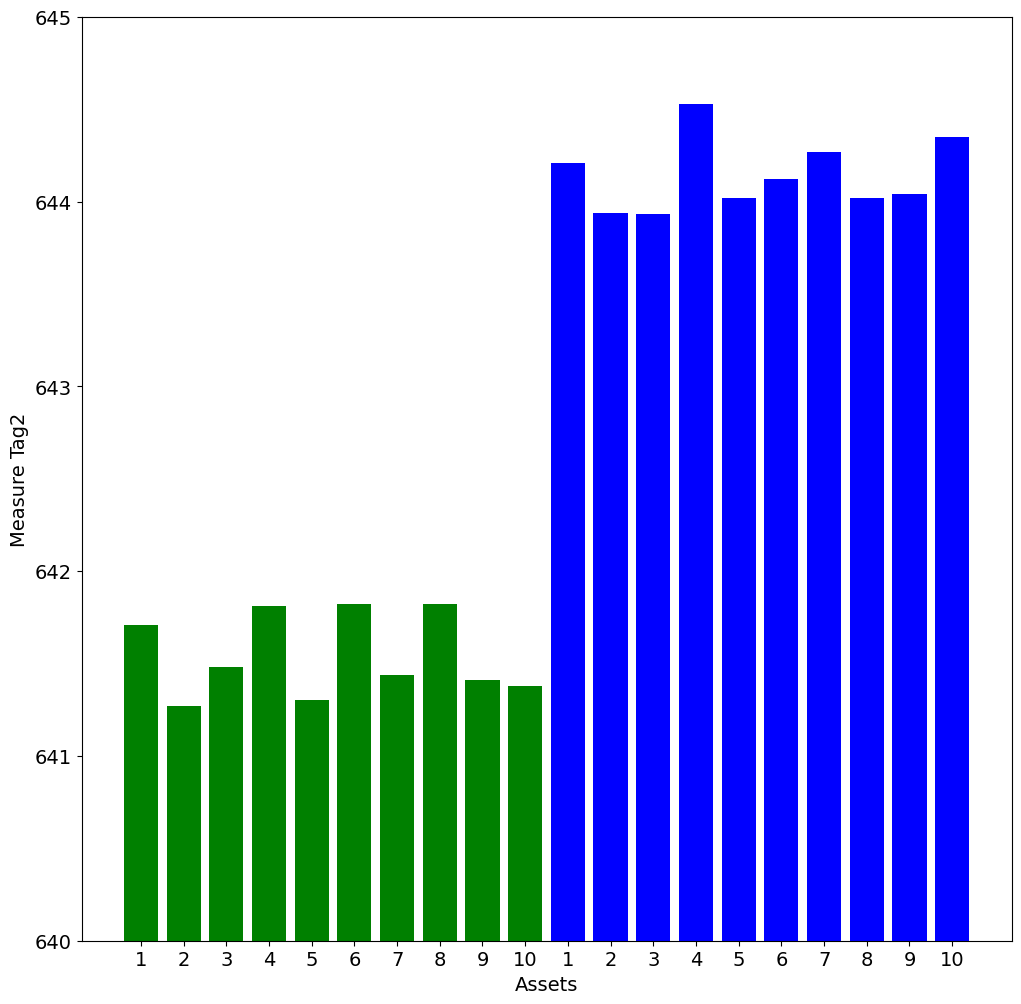

In [ ]:
minb = train.groupby('asset_id', as_index=False).min().head(10)
maxb = train.groupby('asset_id', as_index=False).max().head(10)

mmtable = minb.append(maxb, ignore_index=True)
plt.figure(figsize = (12,12))
col = np.concatenate((np.repeat('green', 10), np.repeat('blue', 10)), axis=0)

bar_labels = list(mmtable['asset_id'])
x_pos = list(range(len(bar_labels)))
bars = plt.bar(x_pos, mmtable['tag2'], color=col)

plt.ylim([640, 645])
plt.xlabel('Assets', fontsize=14)
plt.ylabel('Measure Tag2', fontsize=14)

plt.xticks(x_pos, bar_labels, fontsize=14)
plt.yticks(fontsize=14)

plt.show()

# Data Preparation

In [ ]:
train = pd.merge(train, train.groupby('asset_id',
 as_index=False)['runtime'].max(),
 how='left', on='asset_id')

In [ ]:
train

,asset_id,runtime_x,setting1,setting2,tag2,tag3,tag4,tag5,tag6,tag7,...,tag11,tag12,tag13,tag14,tag15,tag16,tag17,tag20,tag21,runtime_y
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,14.62,21.61,554.36,...,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,39.06,23.4190,192
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,14.62,21.61,553.75,...,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,39.00,23.4236,192
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,14.62,21.61,554.26,...,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,38.95,23.3442,192
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,14.62,21.61,554.45,...,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,14.62,21.61,554.00,...,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,38.90,23.4044,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,14.62,21.61,551.43,...,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,38.49,22.9735,200
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,14.62,21.61,550.86,...,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,38.30,23.1594,200
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,14.62,21.61,550.94,...,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,38.44,22.9333,200
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,14.62,21.61,550.68,...,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,38.29,23.0640,200


In [ ]:
train.rename(columns={"runtime_x": "runtime",
                      "runtime_y": "maxruntime"},
             inplace=True)
train

,asset_id,runtime,setting1,setting2,tag2,tag3,tag4,tag5,tag6,tag7,...,tag11,tag12,tag13,tag14,tag15,tag16,tag17,tag20,tag21,maxruntime
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,14.62,21.61,554.36,...,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,39.06,23.4190,192
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,14.62,21.61,553.75,...,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,39.00,23.4236,192
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,14.62,21.61,554.26,...,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,38.95,23.3442,192
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,14.62,21.61,554.45,...,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,14.62,21.61,554.00,...,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,38.90,23.4044,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,14.62,21.61,551.43,...,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,38.49,22.9735,200
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,14.62,21.61,550.86,...,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,38.30,23.1594,200
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,14.62,21.61,550.94,...,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,38.44,22.9333,200
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,14.62,21.61,550.68,...,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,38.29,23.0640,200


<ipython-input-82-e51c27625068>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['TTF'],kde=True)


<Axes: xlabel='TTF', ylabel='Density'>

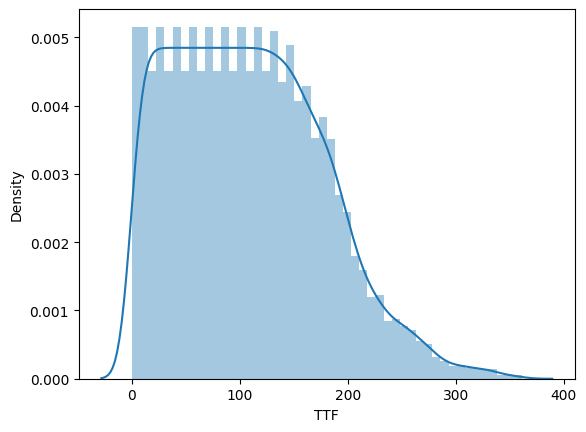

In [ ]:
train['TTF'] = train['maxruntime'] - train['runtime']
sns.distplot(train['TTF'],kde=True)

In [ ]:
train['TTF'].describe()

count    20631.000000
mean       107.807862
std         68.880990
min          0.000000
25%         51.000000
50%        103.000000
75%        155.000000
max        361.000000
Name: TTF, dtype: float64

## Scaling

In [ ]:
scaler = MinMaxScaler()

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
asset_id,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
runtime,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
tag2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
tag3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
tag4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
tag5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
tag6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
tag7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600


In [ ]:
ntrain = train.copy()

In [ ]:
ntrain.iloc[:,2:19] = scaler.fit_transform(ntrain.iloc[:,2:19])

In [ ]:
ntrain.describe().T

,count,mean,std,min,25%,50%,75%,max
asset_id,20631.0,51.506568,29.227633,1.0000,26.000000,52.000000,77.000000,100.0000
runtime,20631.0,108.807862,68.880990,1.0000,52.000000,104.000000,156.000000,362.0000
setting1,20631.0,0.499490,0.125708,0.0000,0.413793,0.500000,0.586207,1.0000
setting2,20631.0,0.501959,0.244218,0.0000,0.333333,0.500000,0.750000,1.0000
tag2,20631.0,0.443052,0.150618,0.0000,0.335843,0.430723,0.539157,1.0000
tag3,20631.0,0.424746,0.133664,0.0000,0.331807,0.415522,0.508829,1.0000
tag4,20631.0,0.450435,0.151935,0.0000,0.339467,0.435348,0.545324,1.0000
tag5,20631.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000
tag6,20631.0,0.980321,0.138898,0.0000,1.000000,1.000000,1.000000,1.0000
tag7,20631.0,0.566459,0.142527,0.0000,0.476651,0.578100,0.669887,1.0000


In [ ]:
ntest = test.copy()

In [ ]:
pd.DataFrame(ntest.columns).T

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,asset_id,runtime,setting1,setting2,tag2,tag3,tag4,tag5,tag6,tag7,...,tag9,tag11,tag12,tag13,tag14,tag15,tag16,tag17,tag20,tag21


In [ ]:
ntest.iloc[:,2:19] = scaler.transform(ntest.iloc[:,2:19])
ntest.describe().T

,count,mean,std,min,25%,50%,75%,max
asset_id,13096.0,51.543907,28.289423,1.000000,28.000000,52.000000,76.000000,100.000000
runtime,13096.0,76.836515,53.057749,1.000000,33.000000,69.000000,113.000000,303.000000
setting1,13096.0,0.499358,0.126591,0.028736,0.413793,0.500000,0.586207,0.948276
setting2,13096.0,0.503532,0.245025,0.000000,0.333333,0.500000,0.750000,1.083333
tag2,13096.0,0.381051,0.120753,-0.024096,0.297440,0.376506,0.460843,0.930723
tag3,13096.0,0.371903,0.109075,-0.043601,0.295618,0.369523,0.443046,0.795945
tag4,13096.0,0.379564,0.112902,0.036124,0.298785,0.374578,0.452397,0.862762
tag5,13096.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
tag6,13096.0,0.970067,0.170408,0.000000,1.000000,1.000000,1.000000,1.000000
tag7,13096.0,0.629231,0.109708,0.165862,0.557166,0.636071,0.706924,0.964573


## Visualizing the Scaled Data

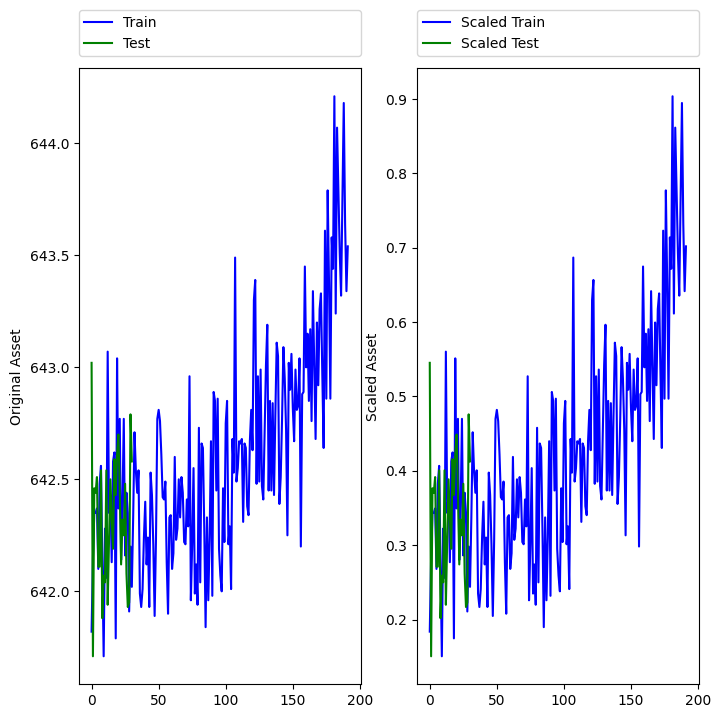

In [ ]:
fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)

plt.plot(train[train.asset_id==1].tag2, color='blue')
plt.plot(test[test.asset_id==1].tag2, color='green')

plt.legend(['Train','Test'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
            mode='expand', borderaxespad=0)
plt.ylabel('Original Asset')

fig.add_subplot(1,2,2)
plt.plot(ntrain[ntrain.asset_id==1].tag2, color='blue')
plt.plot(ntest[ntest.asset_id==1].tag2, color='green')

plt.legend(['Scaled Train','Scaled Test'], bbox_to_anchor=(0., 1.02, 1., .102),
           loc=3, mode='expand', borderaxespad=0)
plt.ylabel('Scaled Asset')

plt.show()

# Model Testing

## Fraction Time-to-Failure (FTTF)

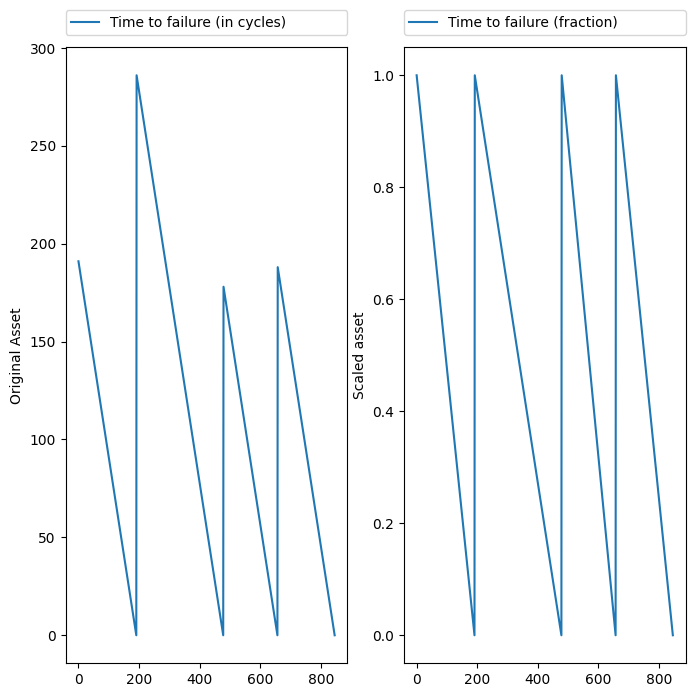

In [ ]:
def fractionTTF(dat,q):
 return(dat.TTF[q]-dat.TTF.min()) / float(dat.TTF.max()-dat.TTF.min())

fTTFz = []
fTTF = []

for i in range(train['asset_id'].min(),train['asset_id'].max()+1):
 dat=train[train.asset_id==i]
 dat = dat.reset_index(drop=True)
 for q in range(len(dat)):
  fTTFz = fractionTTF(dat, q)
  fTTF.append(fTTFz)

ntrain['fTTF'] = fTTF
mx = cyclestrain.iloc[0:4,1].sum()

fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(ntrain.TTF[0:mx])
plt.legend(['Time to failure (in cycles)'], bbox_to_anchor=(0., 1.02, 1., .102),
           loc=3, mode="expand", borderaxespad=0)

plt.ylabel('Original Asset')
fig.add_subplot(1,2,2)
plt.plot(ntrain.fTTF[0:mx])
plt.legend(['Time to failure (fraction)'], bbox_to_anchor=(0., 1.02, 1., .102),
           loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Scaled asset')
plt.show()

In [ ]:
pd.DataFrame(ntrain.columns).T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,asset_id,runtime,setting1,setting2,tag2,tag3,tag4,tag5,tag6,tag7,...,tag13,tag14,tag15,tag16,tag17,tag20,tag21,maxruntime,TTF,fTTF


In [ ]:
X_train = ntrain.values[:,1:19]
X_train

array([[1.00000000e+00, 4.59770115e-01, 1.66666667e-01, ...,
        3.63986149e-01, 0.00000000e+00, 3.33333333e-01],
       [2.00000000e+00, 6.09195402e-01, 2.50000000e-01, ...,
        4.11312043e-01, 0.00000000e+00, 3.33333333e-01],
       [3.00000000e+00, 2.52873563e-01, 7.50000000e-01, ...,
        3.57445171e-01, 0.00000000e+00, 1.66666667e-01],
       ...,
       [1.98000000e+02, 5.22988506e-01, 5.00000000e-01, ...,
        9.22277799e-01, 0.00000000e+00, 8.33333333e-01],
       [1.99000000e+02, 4.36781609e-01, 7.50000000e-01, ...,
        8.23393613e-01, 0.00000000e+00, 5.83333333e-01],
       [2.00000000e+02, 3.16091954e-01, 8.33333333e-02, ...,
        6.87572143e-01, 0.00000000e+00, 6.66666667e-01]])

In [ ]:
X_train.shape

(20631, 18)

In [ ]:
Y_train = ntrain.values[:, 21]
Y_train

array([192., 192., 192., ..., 200., 200., 200.])

In [ ]:
Y_train.shape

(20631,)

In [ ]:
X_test = ntest.values[:,1:19]
X_test

array([[  1.        ,   0.63218391,   0.75      , ...,   0.30896499,
          0.        ,   0.33333333],
       [  2.        ,   0.34482759,   0.25      , ...,   0.21315891,
          0.        ,   0.41666667],
       [  3.        ,   0.51724138,   0.58333333, ...,   0.45863794,
          0.        ,   0.41666667],
       ...,
       [196.        ,   0.46551724,   0.25      , ...,   0.50788765,
          0.        ,   0.58333333],
       [197.        ,   0.2816092 ,   0.58333333, ...,   0.56252405,
          0.        ,   0.58333333],
       [198.        ,   0.57471264,   0.75      , ...,   0.63639861,
          0.        ,   0.66666667]])

In [ ]:
X_test.shape

(13096, 18)

## Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
score = regressor.predict(X_test)

In [ ]:
score[0:10]

array([216.56, 229.78, 212.87, 210.5 , 215.5 , 235.52, 222.65, 217.91,
       229.78, 226.17])

In [ ]:
print(score.min(), score.max())

139.58 361.31


In [ ]:
test = pd.merge(test, test.groupby('asset_id',as_index=False)['runtime'].max(),
                how='left', on='asset_id')
test.rename(columns={"runtime_x": "runtime", "runtime_y": "maxruntime"},
            inplace=True)
test['score'] = score
test.head()

,asset_id,runtime,setting1,setting2,tag2,tag3,tag4,tag5,tag6,tag7,...,tag12,tag13,tag14,tag15,tag16,tag17,tag20,tag21,maxruntime,score
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,14.62,21.61,553.90,...,521.72,2388.03,8125.55,8.4052,0.03,392,38.86,23.3735,31,216.56
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,14.62,21.61,554.85,...,522.16,2388.06,8139.62,8.3803,0.03,393,39.02,23.3916,31,229.78
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,14.62,21.61,554.11,...,521.97,2388.03,8130.10,8.4441,0.03,393,39.08,23.4166,31,212.87
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,14.62,21.61,554.07,...,521.38,2388.05,8132.90,8.3917,0.03,391,39.00,23.3737,31,210.50
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,14.62,21.61,554.16,...,522.15,2388.03,8129.54,8.4031,0.03,390,38.99,23.4130,31,215.50


In [ ]:
def totcycles(data):
 return(data['runtime'] / (1-data['score']))

test['maxpredcycles'] = totcycles(test)

In [ ]:
def RULfunction(data):
 return(data['maxpredcycles'] - data['maxruntime'])

In [ ]:
 test['RUL'] = RULfunction(test)

In [ ]:
test['RUL'].head()

0   -31.004639
1   -31.008742
2   -31.014160
3   -31.019093
4   -31.023310
Name: RUL, dtype: float64

# Evaluation

In [ ]:
t = test.columns == 'RUL'
ind = [i for i, x in enumerate(t) if x]

predictedRUL = []
for i in range(test.asset_id.min(), test.asset_id.max()+1):
  npredictedRUL=test[test.asset_id==i].iloc[test[test.asset_id==i].runtime.max()-1,ind]
  predictedRUL.append(npredictedRUL)

In [ ]:
RUL = pd.DataFrame(test.groupby('asset_id')['runtime'].max()).reset_index()
RUL.columns = ['id', 'max']

In [ ]:
RUL.head()

,id,max
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98


In [ ]:
xtrueRUL = list(RUL['max'])
otrueRUL = []

for i in range(0,len(xtrueRUL)):
 otrueRUL = np.concatenate((otrueRUL,
 list(reversed(np.arange((int(xtrueRUL[i])))))))
 xpredictedRUL = list(round(x) for x in predictedRUL)

opredictedRUL = []
for i in range(0,len(xpredictedRUL)):
  opredictedRUL = np.concatenate((opredictedRUL,
                                    list(reversed(np.arange(-1*(int((xpredictedRUL[i].item()))))))))

xpredictedRUL1= []
for i in range(0,len(xpredictedRUL)):
    xpredictedRUL1.append(-1*(int(xpredictedRUL[i])) )

xpredictedRUL2 = np.array(xpredictedRUL1)

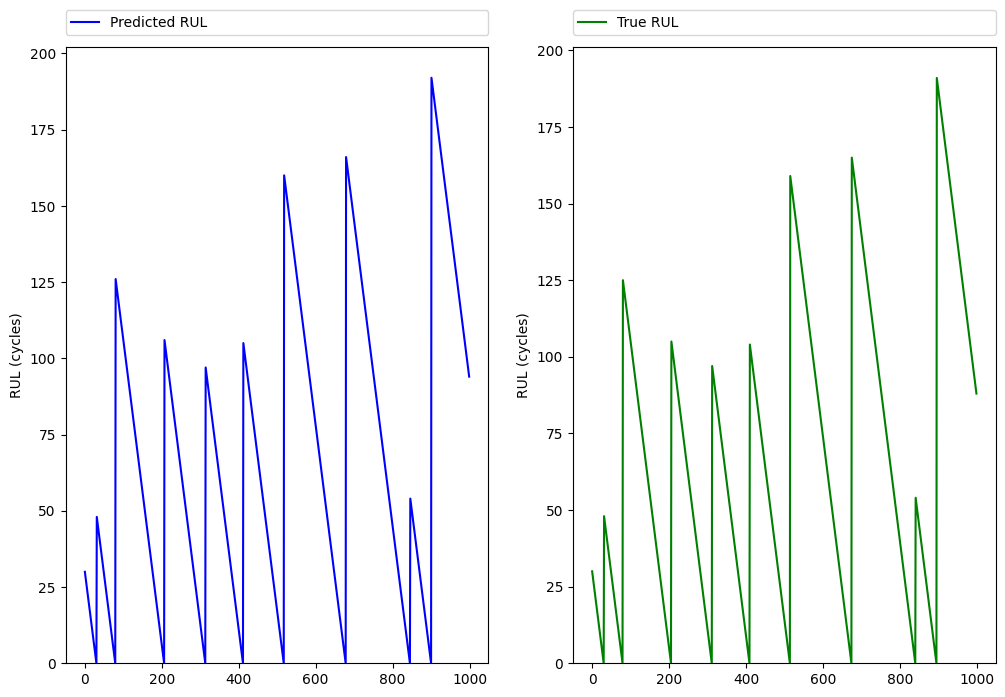

In [ ]:
mx = 1000

fig = plt.figure(figsize = (12, 8))
fig.add_subplot(1,2,1)

plt.plot(opredictedRUL[0:mx], color='blue')
plt.legend(['Predicted RUL'], bbox_to_anchor=(0., 1.02, 1., .102),
            loc=3, mode='expand', borderaxespad=0)

plt.ylim(0, opredictedRUL[0:mx].max()+10)
plt.ylabel('RUL (cycles)')

fig.add_subplot(1,2,2)
plt.plot(otrueRUL[0:mx], color='green')

plt.legend(['True RUL'], bbox_to_anchor=(0., 1.02, 1., .102),
 loc=3, mode='expand', borderaxespad=0)
plt.ylabel('RUL (cycles)')
plt.ylim(0,otrueRUL[0:mx].max()+10)

plt.show()

In [ ]:
df1['diff'] = df1['predicted']-df1['true']
df1.head()

,true,predicted,diff
0,31,31,0
1,49,49,0
2,126,127,1
3,106,107,1
4,98,98,0


In [ ]:
pd.DataFrame({'Count': [(df1['diff']<0).sum(), (df1['diff']==0).sum(),
 (df1['diff']>0).sum()]}, columns=['Count'],
 index=['Smaller', 'Zero', 'Larger'])

,Count
Smaller,0
Zero,35
Larger,65
